In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [8]:
#Load the experiment data
def get_data():
    data=load_svmlight_file("housing_scale")
    return data[0],data[1]

x,y=get_data();

In [9]:
#divide dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [10]:
#choose loss function and derivation
def lossFunction(x,y,w,b):
    cost=np.sum(np.square(x*w+b-y))/(2*x.shape[0])
    return cost
def derivation(x,y,w,b):
    wd=((x*w+b-y)*x)/x.shape[0]
    bd=np.sum(x*w+b-y)/x.shape[0]
    return wd,bd

In [11]:
def linearRegression(x_train,x_test,y_train,y_test,delta,num_iters):
    w=np.zeros(x.shape[1])
    b=0
    trainCost=np.zeros(num_iters)
    validateCost=np.zeros(num_iters)
    for i in range(num_iters):
        trainCost[i]=lossFunction(x_train,y_train,w,b)
        validateCost[i]=lossFunction(x_test,y_test,w,b)
        Gw,Gb=derivation(x_train,y_train,w,b);
        Dw=-Gw
        Db=-Gb
        w=w+delta*Dw
        b=b+delta*Db
    return trainCost,validateCost,w,b

[-4.21869585 -2.89835474 -1.48593963 -2.94174748 -1.67245522  0.9595276
  1.0282034  -2.17136735 -1.50342098 -1.3016072   0.19174516  3.73170007
 -2.71061868]
4.39434604971


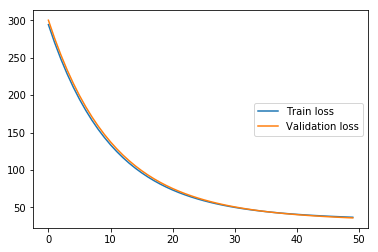

In [12]:
num_iters=50;
delta=0.01
train_cost,validate_cost,w,b=linearRegression(x_train,x_test,y_train,y_test,delta,num_iters)
print(w)
print(b)
plt.figure(1)
x=np.arange(0,num_iters,1)
plt.plot(x,train_cost,label = "Train loss")
plt.plot(x,validate_cost,label = "Validation loss")
plt.legend(loc='right')
plt.show()